In [4]:
import pandas as pd
import numpy
import matplotlib

In [5]:
raw_data = pd.read_excel('medical_data.xlsx',sheet_name = 'Sheet1')
raw_data

,Patient,Diagnosis,Date,Gender,Age,CMV IgM,CMV IgG,HSV IgM,HSV IgG,VZV IgM,...,Monocyte(#),Monocyte(%),Neutrophil(#),Neutrophil(%),ESR,CRP,CMV PCR[EYE],HSV type I PCR[EYE],HSV type II PCR[EYE],VZV PCR[EYE]
0,10001829,0,2020-06-15,0,65,NaN,NaN,NaN,NaN,NaN,...,0.4,9.1,1.8,NaN,30.0,1.4,NaN,NaN,NaN,NaN
1,10002333,0,2020-08-29,0,59,NaN,NaN,NaN,NaN,NaN,...,0.41,7.5,2.98,54.8,NaN,NaN,NaN,NaN,NaN,NaN
2,10003076,0,2021-06-02,0,67,NaN,NaN,NaN,NaN,NaN,...,0.55,4.8,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10003076,0,2021-09-24,0,67,NaN,NaN,NaN,NaN,NaN,...,0.17,1.3,12.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10003076,0,2021-12-28,0,67,NaN,NaN,NaN,NaN,NaN,...,0.72,9.7,5.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996860,0,2021-01-19,0,8,NaN,NaN,NaN,NaN,NaN,...,0.39,6.2,3.32,52.3,9.0,2.2,NaN,NaN,NaN,NaN
9996,9996860,0,2021-07-10,0,9,NaN,NaN,NaN,NaN,NaN,...,0.37,5.5,3.83,57.3,28.0,1.8,NaN,NaN,NaN,NaN
9997,9996860,0,2021-10-05,0,9,NaN,NaN,NaN,NaN,NaN,...,0.3,3.9,4.31,55.9,28.0,2.6,NaN,NaN,NaN,NaN
9998,9996860,0,2022-01-10,0,9,NaN,NaN,NaN,NaN,NaN,...,0.28,3.7,4.41,57.6,43.0,6.1,NaN,NaN,NaN,NaN


### total 10,000 data
Patient	3021명
Diagnosis	0,1,2
Date	2005-01-05 ~ 2022-05-03
Gender	0,1
Age	
CMV IgM	
CMV IgG	
HSV IgM	
HSV IgG	
VZV IgM
VZV IgG
WBC COUNT
Lymphocyte(#)
Lymphocyte(%)
Monocyte(#)	
Monocyte(%)	
Neutrophil(#)	
Neutrophil(%)	
ESR	
CRP

### diagnosis 바뀐 경우 54 (0,1 또는 0,2 인 경우 44개, 1 2 섞인 경우 10개)

## # of Missing value 

In [38]:
#total = df_train.isna()

total = raw_data.isnull().sum().sort_values(ascending = False) #내림차순 
percent = (raw_data.isnull().sum() / raw_data.isnull().count()).sort_values(ascending = False)

In [6]:
raw_data.isnull().sum()

Patient                    0
Diagnosis                  0
Date                       0
Gender                     0
Age                        0
CMV IgM                 9134
CMV IgG                 9161
HSV IgM                 9107
HSV IgG                 9333
VZV IgM                 9225
VZV IgG                 9225
WBC COUNT                556
Lymphocyte(#)            925
Lymphocyte(%)            925
Monocyte(#)              925
Monocyte(%)              925
Neutrophil(#)            925
Neutrophil(%)           2693
ESR                     5035
CRP                     5134
CMV PCR[EYE]            9705
HSV type I PCR[EYE]     9792
HSV type II PCR[EYE]    9809
VZV PCR[EYE]            9820
dtype: int64

In [37]:
raw_data.isnull().sum()/raw_data.isnull().count()*100

Patient                  0.00
Diagnosis                0.00
Date                     0.00
Gender                   0.00
Age                      0.00
CMV IgM                 91.34
CMV IgG                 91.61
HSV IgM                 91.07
HSV IgG                 93.33
VZV IgM                 92.25
VZV IgG                 92.25
WBC COUNT                5.56
Lymphocyte(#)            9.25
Lymphocyte(%)            9.25
Monocyte(#)              9.25
Monocyte(%)              9.25
Neutrophil(#)            9.25
Neutrophil(%)           26.93
ESR                     50.35
CRP                     51.34
CMV PCR[EYE]            97.05
HSV type I PCR[EYE]     97.92
HSV type II PCR[EYE]    98.09
VZV PCR[EYE]            98.20
dtype: float64

In [26]:
print(len(raw_data['CMV IgM']))
print(raw_data['CMV IgM'].describe())

10000
count    866.000000
mean       0.099351
std        0.368809
min        0.000000
25%        0.000000
50%        0.000000
75%        0.109250
max        6.640000
Name: CMV IgM, dtype: float64


In [28]:
print(len(raw_data['CMV IgM']))
print(raw_data['CMV IgG'].describe())

10000
count    839.000000
mean      41.009743
std       32.879870
min        0.000000
25%       17.850000
50%       37.000000
75%       54.000000
max      267.000000
Name: CMV IgG, dtype: float64


In [29]:
print(len(raw_data['HSV IgM']))
print(raw_data['HSV IgM'].describe())

10000
count    893.000000
mean       0.264057
std        0.428801
min        0.000000
25%        0.000000
50%        0.100000
75%        0.500000
max        5.100000
Name: HSV IgM, dtype: float64


In [30]:
print(len(raw_data['HSV IgG']))
print(raw_data['HSV IgG'].describe())

10000
count    667.000000
mean      48.279385
std       47.598559
min        0.000000
25%        7.985000
50%       30.000000
75%       78.000000
max      244.000000
Name: HSV IgG, dtype: float64


In [33]:
print(len(raw_data['VZV IgM']))
print(raw_data['VZV IgM'].describe())

10000
count     775.000
unique    185.000
top         0.025
freq      377.000
Name: VZV IgM, dtype: float64


In [34]:
print(len(raw_data['VZV IgG']))
print(raw_data['VZV IgG'].describe())

10000
count     775.000000
mean      837.857535
std      1034.776210
min         0.000000
25%         6.050000
50%       520.000000
75%      1249.000000
max      8500.000000
Name: VZV IgG, dtype: float64


## 각 병의 분포 (환자 수)

In [7]:
def print_class_num(df, label_name):            # 클래스의 비율을 알아보기 위한 함수
  n_total = len(df)                             # 데이터의 총 개수
  n_0 = len(df.query(label_name + ' == 0'))   # label로 0을 사용하는 열 개수
  n_1 = len(df.query(label_name + ' == 1'))   # label로 1을 사용하는 열 개수
  n_2 = len(df.query(label_name + ' == 2'))   # label로 2을 사용하는 열 개수
 

  print("NIU (0) : {}개, {:.2f}%".format(n_0, n_0*100/n_total))
  print("ARN (1) : {}개, {:.2f}%\n".format(n_1, n_1*100/n_total))
  print("CMV (2) : {}개, {:.2f}%\n".format(n_2, n_2*100/n_total))

  values = df[label_name].value_counts()        # label로 사용하는 열의 값을 카운트 
  values.plot(kind='bar')
  print(values)

NIU (0) : 8805개, 88.05%
ARN (1) : 174개, 1.74%

CMV (2) : 1021개, 10.21%

0    8805
2    1021
1     174
Name: Diagnosis, dtype: int64


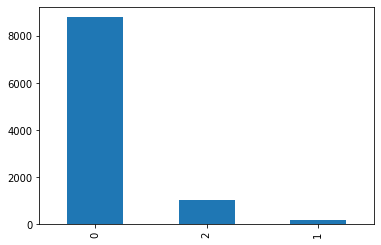

In [8]:
print_class_num(raw_data,'Diagnosis')